<a href="https://colab.research.google.com/github/ojasnadkar96/cs273p_project/blob/master/multiLayerPerceptron2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Multi-layer Perceptron (PCA - 24 features)

Importing all the required libraries.<br>

In [0]:
import pickle
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
%matplotlib inline

import numpy
from sklearn.model_selection import GridSearchCV
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier

The two functions below are to save and import pickle files.<br>

In [0]:
def save_pkl(df,name):
    fullname = name+'.pkl'
    output = open(fullname, 'wb')
    pickle.dump(df, output)
    output.close()

In [0]:
def import_pkl(df,name):
    fullname = name+'.pkl'
    df = pickle.load(open(fullname, 'rb'))
    return df

In [0]:
df_train = pd.DataFrame()
df_valid = pd.DataFrame()
df_test = pd.DataFrame()
df_train_l = pd.DataFrame()
df_valid_l = pd.DataFrame()
df_test_l = pd.DataFrame()

In [0]:
df_train = import_pkl(df_train,'train_x')
df_valid = import_pkl(df_valid,'valid_x')
df_test = import_pkl(df_test,'test_x')
df_train_l = import_pkl(df_train_l,'train_x_l')
df_valid_l = import_pkl(df_valid_l,'valid_x_l')
df_test_l = import_pkl(df_test_l,'test_x_l')

In [76]:
print(df_train.shape)
print(df_valid.shape)
print(df_test.shape)
print(df_train_l.shape)
print(df_valid_l.shape)
print(df_test_l.shape)

(77854, 168)
(13737, 168)
(10175, 168)
(77854, 1)
(13737, 1)
(10175, 1)


Pre-processed data with a total of 168 features has been imported into dataframes.<br>
We will apply PCA on these datasets to reduce the dimensionality of this data.<br>

In [0]:
from sklearn.decomposition import PCA
dims = []
variances = []
optimum_dim = 168
threshold=0.01
for dim in range(1, 168):
    pca = PCA(n_components=dim)
    pca.fit(df_train)
    variance = np.array(pca.explained_variance_ratio_)
    variance = variance.min()
    if threshold < variance:
        optimum_dim = dim
        dims.append(dim)
        variances.append(variance)
    else:
        break

24


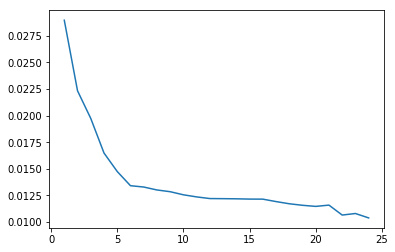

In [78]:
print(optimum_dim)
import matplotlib.pyplot as plt
plt.plot(dims, variances)
plt.show()

Optimal value for PCA is 24 features, as we can see in the graph above.<br>

In [79]:
pca = PCA(n_components=24)
pca_train = pca.fit_transform(df_train)
print(pca.explained_variance_ratio_)

[0.02895799 0.02233207 0.01973592 0.01650457 0.01473513 0.01347959
 0.01341078 0.01308768 0.01292678 0.01249606 0.01235684 0.01218551
 0.01218051 0.01213256 0.01208663 0.01204374 0.01199178 0.01195113
 0.01188193 0.01177171 0.01159093 0.01151983 0.01088789 0.01072156]


We have now reduced the train dataset into 24 features using PCA.

The input is set to 24 as there are 24 features in the reduced dataset.<br>
We initialize a random model with 3 hidden layers of size 256, 512 and 256 respectively.<br>
The epochs are set to 25 and the batch size is set to 100.<br>
We will test the accuracy on train and validation for this model.<br>

In [80]:
test_model = Sequential()
test_model.add(Dense(24, input_dim=24, activation='relu'))
test_model.add(Dense(256, activation='relu'))
test_model.add(Dense(512, activation='relu'))
test_model.add(Dense(256, activation='relu'))
test_model.add(Dense(1, activation='sigmoid'))
test_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
test_model.fit(pca_train, df_train_l, epochs=25, batch_size=100)

Epoch 1/25
77854/77854 [==============================] - 8s 104us/step - loss: 0.6430 - acc: 0.4553
Epoch 2/25
77854/77854 [==============================] - 7s 86us/step - loss: 0.6126 - acc: 0.4652
Epoch 3/25
77854/77854 [==============================] - 7s 84us/step - loss: 0.5990 - acc: 0.4793
Epoch 4/25
77854/77854 [==============================] - 6s 81us/step - loss: 0.5914 - acc: 0.4832
Epoch 5/25
77854/77854 [==============================] - 7s 84us/step - loss: 0.5861 - acc: 0.4856
Epoch 6/25
77854/77854 [==============================] - 6s 82us/step - loss: 0.5816 - acc: 0.4904
Epoch 7/25
77854/77854 [==============================] - 6s 82us/step - loss: 0.5771 - acc: 0.4927
Epoch 8/25
77854/77854 [==============================] - 6s 83us/step - loss: 0.5708 - acc: 0.4947
Epoch 9/25
77854/77854 [==============================] - 7s 85us/step - loss: 0.5631 - acc: 0.4975
Epoch 10/25
77854/77854 [==============================] - 7s 84us/step - loss: 0.5592 - acc: 0.493

In [81]:
score_train = test_model.evaluate(pca_train,df_train_l)
print("score: ", score_train[1]*100)

77854/77854 [==============================] - 4s 57us/step
score:  50.65764122695619


In [82]:
pca_valid = pca.transform(df_valid)
score_valid = test_model.evaluate(pca_valid,df_valid_l)
print("score: ", score_valid[1]*100)

13737/13737 [==============================] - 1s 55us/step
score:  47.50673363907695


In [83]:
pca_test = pca.transform(df_test)
score_test = test_model.evaluate(pca_test,df_test_l)
print("score: ", score_test[1]*100)

10175/10175 [==============================] - 1s 52us/step
score:  48.10810810810811


The train, validation and test accuracy is: 50%, 47.5% and 48.1% respectively.<br>
Let us see if we can increase this accuracy by tuning the parameters.<br>

### Optimizer

We will tune the optimizer.<br>
We have options between `adam` and `SGD`<br>
We will use GridSearchCV on top of Keras to tune the parameter.<br>
The epochs and batchsize is kept the same as for above model.<br>

In [0]:
def nn_model_1(optimizer='adam'):
  model_1 = Sequential()
  model_1.add(Dense(24, input_dim=24, activation='relu'))
  model_1.add(Dense(256, activation='relu'))
  model_1.add(Dense(512, activation='relu'))
  model_1.add(Dense(256, activation='relu'))
  model_1.add(Dense(1, activation='sigmoid'))
  model_1.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])
  return model_1

In [0]:
model_1 = KerasClassifier(build_fn=nn_model_1, epochs=25, batch_size=100, verbose=1)

In [0]:
optimizer = ['SGD', 'Adam']
param_grid_1 = dict(optimizer=optimizer)

In [47]:
grid_2 = GridSearchCV(estimator=model_1, param_grid=param_grid_1, n_jobs=4, verbose=1, cv=2)
grid_2.fit(pca_train,df_train_l)
grid_2.best_params_

Fitting 2 folds for each of 2 candidates, totalling 4 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   2 out of   4 | elapsed:  3.0min remaining:  3.0min
[Parallel(n_jobs=4)]: Done   4 out of   4 | elapsed:  3.3min finished


Epoch 1/25
77854/77854 [==============================] - 7s 86us/step - loss: 0.6509 - acc: 0.4522
Epoch 2/25
77854/77854 [==============================] - 6s 74us/step - loss: 0.6163 - acc: 0.4781
Epoch 3/25
77854/77854 [==============================] - 6s 75us/step - loss: 0.5985 - acc: 0.4868
Epoch 4/25
77854/77854 [==============================] - 6s 74us/step - loss: 0.5823 - acc: 0.4934
Epoch 5/25
77854/77854 [==============================] - 6s 75us/step - loss: 0.5788 - acc: 0.4952
Epoch 6/25
77854/77854 [==============================] - 6s 72us/step - loss: 0.5769 - acc: 0.4981
Epoch 7/25
77854/77854 [==============================] - 6s 73us/step - loss: 0.5700 - acc: 0.4975
Epoch 8/25
77854/77854 [==============================] - 6s 71us/step - loss: 0.5601 - acc: 0.4995
Epoch 9/25
77854/77854 [==============================] - 5s 70us/step - loss: 0.5602 - acc: 0.4987
Epoch 10/25
77854/77854 [==============================] - 6s 76us/step - loss: 0.5505 - acc: 0.5020

{'optimizer': 'Adam'}

Optimal optmizer is `Adam`<br>
We'll use this from now on.<br>

### Initialization

We will tune the Initialization.<br>
We have options between `uniform` and `normal`<br>
We will use GridSearchCV on top of Keras to tune the parameter.<br>
The epochs and batchsize is kept the same as for above model.<br>

In [0]:
def nn_model_2(init_mode='uniform'):
  model_2 = Sequential()
  model_2.add(Dense(24, input_dim=24, kernel_initializer=init_mode, activation='relu'))
  model_2.add(Dense(256, kernel_initializer=init_mode, activation='relu'))
  model_2.add(Dense(512, kernel_initializer=init_mode, activation='relu'))
  model_2.add(Dense(256, kernel_initializer=init_mode, activation='relu'))
  model_2.add(Dense(1, kernel_initializer=init_mode, activation='sigmoid'))
  model_2.compile(loss='binary_crossentropy', optimizer='Adam', metrics=['accuracy'])
  return model_2

In [0]:
model_2 = KerasClassifier(build_fn=nn_model_2, epochs=25, batch_size=100, verbose=1)

In [0]:
init_mode = ['uniform','normal']
param_grid_2 = dict(init_mode=init_mode)

In [51]:
grid_2 = GridSearchCV(estimator=model_2, param_grid=param_grid_2, n_jobs=4, verbose=1, cv=2)
grid_2.fit(pca_train,df_train_l)
grid_2.best_params_

Fitting 2 folds for each of 2 candidates, totalling 4 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   2 out of   4 | elapsed:  3.9min remaining:  3.9min
[Parallel(n_jobs=4)]: Done   4 out of   4 | elapsed:  3.9min finished


Epoch 1/25
77854/77854 [==============================] - 6s 81us/step - loss: 0.6468 - acc: 0.4592
Epoch 2/25
77854/77854 [==============================] - 6s 71us/step - loss: 0.6189 - acc: 0.4847
Epoch 3/25
77854/77854 [==============================] - 6s 71us/step - loss: 0.6096 - acc: 0.4881
Epoch 4/25
77854/77854 [==============================] - 6s 71us/step - loss: 0.5987 - acc: 0.4890
Epoch 5/25
77854/77854 [==============================] - 5s 70us/step - loss: 0.6170 - acc: 0.4912
Epoch 6/25
77854/77854 [==============================] - 5s 70us/step - loss: 0.6134 - acc: 0.4910
Epoch 7/25
77854/77854 [==============================] - 5s 70us/step - loss: 0.5874 - acc: 0.4926
Epoch 8/25
77854/77854 [==============================] - 6s 73us/step - loss: 0.5901 - acc: 0.4934
Epoch 9/25
77854/77854 [==============================] - 6s 71us/step - loss: 0.5791 - acc: 0.4931
Epoch 10/25
77854/77854 [==============================] - 6s 72us/step - loss: 0.5809 - acc: 0.4960

{'init_mode': 'uniform'}

Optimal Initialization is `uniform`<br>
We'll use this from now on.<br>

### Activation Function

We will tune the Activation Function.<br>
We have options between `relu` and `softmax`<br>
We will use GridSearchCV on top of Keras to tune the parameter.<br>
The epochs and batchsize is kept the same as for above model.<br>

In [0]:
def nn_model_3(activation='relu'):
  model_3 = Sequential()
  model_3.add(Dense(24, input_dim=24, kernel_initializer='uniform', activation=activation))
  model_3.add(Dense(256, kernel_initializer='uniform', activation=activation))
  model_3.add(Dense(512, kernel_initializer='uniform', activation=activation))
  model_3.add(Dense(256, kernel_initializer='uniform', activation=activation))
  model_3.add(Dense(1, kernel_initializer='uniform', activation='sigmoid'))
  model_3.compile(loss='binary_crossentropy', optimizer='Adam', metrics=['accuracy'])
  return model_3

In [0]:
model_3 = KerasClassifier(build_fn=nn_model_3, epochs=25, batch_size=100, verbose=1)

In [0]:
activation = ['softmax','relu']
param_grid_3 = dict(activation=activation)

In [55]:
grid_3 = GridSearchCV(estimator=model_3, param_grid=param_grid_3, n_jobs=4, verbose=1, cv=2)
grid_3.fit(pca_train,df_train_l)
grid_3.best_params_

Fitting 2 folds for each of 2 candidates, totalling 4 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   2 out of   4 | elapsed:  3.9min remaining:  3.9min
[Parallel(n_jobs=4)]: Done   4 out of   4 | elapsed:  4.1min finished


Epoch 1/25
77854/77854 [==============================] - 8s 105us/step - loss: 0.6468 - acc: 0.4515
Epoch 2/25
77854/77854 [==============================] - 7s 86us/step - loss: 0.6112 - acc: 0.4852
Epoch 3/25
77854/77854 [==============================] - 7s 92us/step - loss: 0.5914 - acc: 0.4937
Epoch 4/25
77854/77854 [==============================] - 7s 94us/step - loss: 0.5852 - acc: 0.4933
Epoch 5/25
77854/77854 [==============================] - 7s 89us/step - loss: 0.5801 - acc: 0.4949
Epoch 6/25
77854/77854 [==============================] - 7s 88us/step - loss: 0.5777 - acc: 0.4938
Epoch 7/25
77854/77854 [==============================] - 7s 93us/step - loss: 0.5749 - acc: 0.4961
Epoch 8/25
77854/77854 [==============================] - 7s 90us/step - loss: 0.5733 - acc: 0.4974
Epoch 9/25
77854/77854 [==============================] - 6s 72us/step - loss: 0.5881 - acc: 0.4952
Epoch 10/25
77854/77854 [==============================] - 6s 72us/step - loss: 0.5659 - acc: 0.498

{'activation': 'relu'}

Optimal Activation Function is `relu`<br>
We'll use this from now on.<br>

### Final Model 1

We will use the tuned parameters and check accuracy.<br>

In [57]:
model_final1 = Sequential()
model_final1.add(Dense(24, input_dim=24, kernel_initializer='uniform', activation='relu'))
model_final1.add(Dense(256, kernel_initializer='uniform', activation='relu'))
model_final1.add(Dense(512, kernel_initializer='uniform', activation='relu'))
model_final1.add(Dense(256, kernel_initializer='uniform', activation='relu'))
model_final1.add(Dense(1, kernel_initializer='uniform', activation='sigmoid'))
model_final1.compile(loss='binary_crossentropy', optimizer='Adam', metrics=['accuracy'])
model_final1.fit(pca_train,df_train_l,epochs=25, batch_size=100, verbose=1)

Epoch 1/25
77854/77854 [==============================] - 9s 118us/step - loss: 0.6470 - acc: 0.4551
Epoch 2/25
77854/77854 [==============================] - 8s 98us/step - loss: 0.6143 - acc: 0.4850
Epoch 3/25
77854/77854 [==============================] - 8s 98us/step - loss: 0.6018 - acc: 0.4912
Epoch 4/25
77854/77854 [==============================] - 7s 93us/step - loss: 0.5926 - acc: 0.4920
Epoch 5/25
77854/77854 [==============================] - 7s 92us/step - loss: 0.5818 - acc: 0.4958
Epoch 6/25
77854/77854 [==============================] - 7s 84us/step - loss: 0.5767 - acc: 0.4970
Epoch 7/25
77854/77854 [==============================] - 6s 74us/step - loss: 0.5755 - acc: 0.4961
Epoch 8/25
77854/77854 [==============================] - 6s 74us/step - loss: 0.5667 - acc: 0.4979
Epoch 9/25
77854/77854 [==============================] - 6s 74us/step - loss: 0.5741 - acc: 0.4972
Epoch 10/25
77854/77854 [==============================] - 7s 86us/step - loss: 0.5707 - acc: 0.496

In [59]:
score_train_f1 = model_final1.evaluate(pca_train,df_train_l)
print("score: ", score_train_f1[1]*100)

77854/77854 [==============================] - 5s 59us/step
score:  52.02815526498318


In [60]:
score_valid_f1 = model_final1.evaluate(pca_valid,df_valid_l)
print("score: ", score_valid_f1[1]*100)

13737/13737 [==============================] - 1s 59us/step
score:  49.836208779209436


In [62]:
score_test_f1 = model_final1.evaluate(pca_test,df_test_l)
print("score: ", score_test_f1[1]*100)

10175/10175 [==============================] - 1s 63us/step
score:  49.307125307125304


The train, validation and test accuracy is: 52%, 49.8% and 49.3% respectively.<br>
This is not a good accuracy as it is almost like the random model we selected.<br>
Now, we will use the same hyperparameters which we used for the 168 feature dataset<br>

### Final Model 2

We will use the tuned parameters from 168 parameter model and check accuracy.<br>

In [84]:
model_final2 = Sequential()
model_final2.add(Dense(24, input_dim=24, kernel_initializer='uniform', activation='relu'))
model_final2.add(Dense(256, kernel_initializer='uniform', activation='relu'))
model_final2.add(Dense(512, kernel_initializer='uniform', activation='relu'))
model_final2.add(Dense(256, kernel_initializer='uniform', activation='relu'))
model_final2.add(Dense(1, kernel_initializer='uniform', activation='sigmoid'))
model_final2.compile(loss='binary_crossentropy', optimizer='SGD', metrics=['accuracy'])
model_final2.fit(pca_train,df_train_l,epochs=25, batch_size=100, verbose=1)

Epoch 1/25
77854/77854 [==============================] - 6s 81us/step - loss: 0.6851 - acc: 0.3501
Epoch 2/25
77854/77854 [==============================] - 5s 64us/step - loss: 0.6826 - acc: 0.3493
Epoch 3/25
77854/77854 [==============================] - 5s 64us/step - loss: 0.6825 - acc: 0.3493
Epoch 4/25
77854/77854 [==============================] - 5s 64us/step - loss: 0.6824 - acc: 0.3493
Epoch 5/25
77854/77854 [==============================] - 5s 63us/step - loss: 0.6824 - acc: 0.3493
Epoch 6/25
77854/77854 [==============================] - 5s 62us/step - loss: 0.6823 - acc: 0.3493
Epoch 7/25
77854/77854 [==============================] - 5s 63us/step - loss: 0.6822 - acc: 0.3493
Epoch 8/25
77854/77854 [==============================] - 5s 62us/step - loss: 0.6820 - acc: 0.3493
Epoch 9/25
77854/77854 [==============================] - 5s 59us/step - loss: 0.6818 - acc: 0.3493
Epoch 10/25
77854/77854 [==============================] - 5s 63us/step - loss: 0.6814 - acc: 0.3493

In [85]:
score_train_f2 = model_final2.evaluate(pca_train,df_train_l)
print("score: ", score_train_f2[1]*100)

77854/77854 [==============================] - 4s 57us/step
score:  46.72592288129062


In [86]:
score_valid_f2 = model_final2.evaluate(pca_valid,df_valid_l)
print("score: ", score_valid_f2[1]*100)

13737/13737 [==============================] - 1s 55us/step
score:  45.73050884472592


In [87]:
score_test_f2 = model_final2.evaluate(pca_test,df_test_l)
print("score: ", score_test_f2[1]*100)

10175/10175 [==============================] - 1s 52us/step
score:  46.77149877149877


The train, validation and test accuracy is: 46.7%, 45.7% and 46.7% respectively.<br>
This model is not overfitting much, but the accuracies are low.<br>
We will proceed with Final Model 1 as the final model.<br>

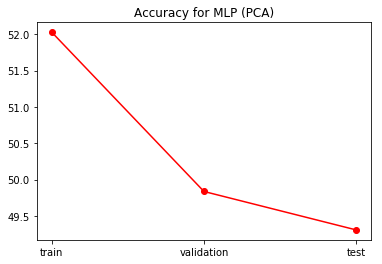

In [88]:
scores = [score_train_f1[1]*100,score_valid_f1[1]*100,score_test_f1[1]*100]
labels = ['train','validation','test']
plt.title("Accuracy for MLP (PCA)")
plt.plot(labels, scores, marker='o', color = "r", label = "Final model scores")
plt.show()

Above is the graph for training, validation and test accuracy for the best model (Final Model 1)<br>